# Getting Started in the Movie Industry

**Author:** Jonathan Lee
***

![example](images/vector-free-movie-icon-set.jpg)

<a href="https://www.vecteezy.com/free-vector/dvd">Dvd Vectors by Vecteezy</a>

## Overview

This analysis focuses on an exploration of data tables from IMDB and The Numbers. We will walk through high-level exploratory data analysis to preview what data we have to work with, data cleansing to ensure that our data is accurate, feature engineering to calculate useful metrics based on the provided data and visualization to effectively explain what aspects of film-making Microsoft should focus on as it embarks on a journey to find success in the film industry. The results from this analysis show that overall, Musicals tend to perform well, but of course there are multiple other factors to keep in consideration.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The goal of this analysis is to explore what types of films are currently doing the best at the box office and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. For this analysis, we will focus on the following questions:

1. What genres of movie are likely to succeed?
2. What genres cost more to produce?
3. How does production budget affect the success of a movie?

## Data Understanding

In this analysis, we will be exploring datasets from IMDB and The Numbers. We can obtain information regarding movie titles, release years, genres, budget, and ratings from IMDB, and financial data from The Numbers.

To create an optimal basis for analysis, we will restrict movie releases from 2015 to 2019. Because movie preferences change with social context over generations, this will ensure that we have a dataset of movies that are relevant in this time period. By setting an upper limit for movie releases at 2019, we also eliminate any unusual data that has been impacted by COVID-19 restrictions. It is safe to make this assumption, since we are seeing more states open up restrictions with the decline of COVID-19 cases.

We will also be focusing on financial information within the US, since it would be best for a new film studio to focus on a specific audience as opposed to a worldwide audience.

### Previewing the Data Tables

In [1]:
# Import standard packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

*include a note regarding how i chose my datasets

In [2]:
# Load and preview data files for ratings and revenue.

imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

display(imdb_title_basics_df.head(),
        imdb_title_ratings_df.head(),
        budgets_df.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Previewing the Data Types

In [3]:
# Display data types of each column in each table

display(imdb_title_basics_df.info(),
        imdb_title_ratings_df.info(),
        budgets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries

None

None

None

## Data Preparation

Because the provided tables currently do not have much meaning by themselves, we need to address missing and duplicated data, and we also need to merge the tables in a way that preserves the accuracy of the data.

### Merging IMDB Data

We begin by merging the two datasets pulled from IMDB on their common id key labeled "tconst" and addressing missing values for genres and average rating, which are both criteria that will be importance in our final analysis.

In [4]:
# Merge imdb tables to pair movie titles with their ratings.

imdb_df = imdb_title_basics_df.merge(imdb_title_ratings_df, how='right', 
                                     on='tconst')

print("number of rows:", len(imdb_df))
display(imdb_df.head())

number of rows: 73856


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [5]:
imdb_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [6]:
# Fill missing genres with 'None' and filter out rows that are missing
# averagerating.

imdb_df['genres'].fillna('None', inplace=True)
imdb_df = imdb_df[imdb_df['averagerating'].notna()]

### Converting Data Types

We want to ensure that our movie titles from the IMDB dataset match with the correct titles from the The Numbers dataset, so we will eventually merge them on the movie title and year. Before we can do so, we need to convert the date information provided in The Numbers dataset into a type and format that matches the date information from IMDB.

In [7]:
# Convert release date to show year only as int type.

budgets_df['release_date'] = budgets_df['release_date'].str[-4:].astype(int)

We also need to format the dollar amounts in order to be able to correctly graph the financial data.

In [8]:
# Remove commas from dollar amounts.

budgets_df['production_budget'] = budgets_df['production_budget'] \
                                 .replace(',', '', regex = True)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'] \
                              .replace(',', '', regex = True)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'] \
                               .replace(',', '', regex = True)

# Remove $ sign and convert to int type.

budgets_df['production_budget'] = budgets_df['production_budget'] \
                                 .str[1:].astype(int)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'] \
                              .str[1:].astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str[1:] \
                               .astype(int)

budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Dropping Unnecessary Columns

Since we will be focusing on domestic gross, we will drop worldwide gross data as well as any other unnecessary columns from our financial table.

In [9]:
budgets_df.drop(columns=['id', 'worldwide_gross'], inplace=True)

In [10]:
# Drop columns 'id' and 'worldwide_gross' which will not be used for analysis.

# del budgets_df['id']
# del budgets_df['worldwide_gross']
budgets_df.head()

,release_date,movie,production_budget,domestic_gross
0,2009,Avatar,425000000,760507625
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,2019,Dark Phoenix,350000000,42762350
3,2015,Avengers: Age of Ultron,330600000,459005868
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382


### Dropping Missing Data Entries

We then need to address any rows where we have missing data for domestic gross.

In [11]:
# Replace all 0 values for domestic gross with NaN.

budgets_df['domestic_gross'] = budgets_df['domestic_gross'] \
                                         .map(lambda x: np.nan if x==0 else x)

In [12]:
# Return only rows where 'domestic_gross' is NOT NaN.

budgets_df = budgets_df[budgets_df['domestic_gross'].notna()]

### Merging Basic Movie Data with Financial Data

This is where we will combine our IMDB dataset, where we have our genre and average rating data, with our The Numbers dataset which includes all of our financial data. In order to ensure that we are not incorrectly merging our financial data on different movies that have the same title, we will use the release year in conjunction with the title in our merge. We also want to make sure to keep only titles that have financial data, hence we will merge left onto our financial table.

In [13]:
# Join financial data from tn_movie_budgets with title and rating date 
# from imdb_df.

merged_df = budgets_df.merge(imdb_df, how='left', left_on=['movie', \
                                                           'release_date'], \
                             right_on=['original_title', 'start_year'])

merged_df.head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2009,Avatar,425000000,760507625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,2019,Dark Phoenix,350000000,42762350.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,2015,Avengers: Age of Ultron,330600000,459005868.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5258 entries, 0 to 5257
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5258 non-null   int64  
 1   movie              5258 non-null   object 
 2   production_budget  5258 non-null   int64  
 3   domestic_gross     5258 non-null   float64
 4   tconst             1330 non-null   object 
 5   primary_title      1330 non-null   object 
 6   original_title     1330 non-null   object 
 7   start_year         1330 non-null   float64
 8   runtime_minutes    1325 non-null   float64
 9   genres             1330 non-null   object 
 10  averagerating      1330 non-null   float64
 11  numvotes           1330 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 534.0+ KB


### Checking for Missing Rating Data

Since it is possible that there was no matching data for each of the entries provided in the financial table, we need to remove any rows that do not have basic movie information data being matched from the IMDB dataset.

In [15]:
# Filter for rows that are not missing rating data.

merged_df = merged_df[merged_df['averagerating'].notna()] \
                                                .sort_values('release_date')

merged_df.head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2530,2010,You Again,20000000,25702053.0,tt1414382,You Again,You Again,2010.0,105.0,"Comedy,Family,Romance",5.8,46690.0
2501,2010,Vampires Suck,20000000,36661504.0,tt1666186,Vampires Suck,Vampires Suck,2010.0,82.0,Comedy,3.4,43984.0
2467,2010,Why Did I Get Married Too?,20000000,60095852.0,tt1391137,Why Did I Get Married Too?,Why Did I Get Married Too?,2010.0,121.0,"Comedy,Drama,Romance",4.6,8653.0
2466,2010,The Last Song,20000000,62950384.0,tt1294226,The Last Song,The Last Song,2010.0,107.0,"Drama,Music,Romance",6.0,74914.0
2449,2010,Jackass 3D,20000000,117229692.0,tt1116184,Jackass 3D,Jackass 3D,2010.0,95.0,"Action,Comedy,Documentary",7.0,53289.0


### Checking and Dropping Duplicates

It is necessary to check for duplicates rows where movie and release date are matching. In order to prevent financial data from being matched with incorrect movies with the same title, we will drop the duplicates which have a lower number of rating votes.

In [16]:
# Drop duplicates based on movie title and release year

merged_df[merged_df.duplicated(subset=['movie', 'release_date'], 
                               keep=False)].head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2654,2010,The Tempest,20000000,277943.0,tt1683003,The Tempest,The Tempest,2010.0,131.0,Drama,7.8,94.0
2653,2010,The Tempest,20000000,277943.0,tt1274300,The Tempest,The Tempest,2010.0,110.0,"Comedy,Drama,Fantasy",5.4,7073.0
1263,2010,The Bounty Hunter,45000000,67061228.0,tt1472211,The Bounty Hunter,The Bounty Hunter,2010.0,NaN,None,6.3,29.0
1262,2010,The Bounty Hunter,45000000,67061228.0,tt1038919,The Bounty Hunter,The Bounty Hunter,2010.0,110.0,"Action,Comedy,Romance",5.6,112444.0
1017,2010,Burlesque,55000000,39440655.0,tt1586713,Burlesque,Burlesque,2010.0,NaN,Drama,7.0,45.0


In [17]:
# Sort values by number of votes in preparation of dropping duplicates with
# lower vote count

merged_df.sort_values('numvotes', ascending=False, inplace=True)

# Drop duplicated movie with lower vote count

merged_df.drop_duplicates(subset=['movie', 'release_date'], inplace=True)

merged_df.head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
139,2010,Inception,160000000,292576195.0,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
10,2012,The Dark Knight Rises,275000000,448139099.0,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",8.4,1387769.0
133,2014,Interstellar,165000000,188017894.0,tt0816692,Interstellar,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
369,2012,Django Unchained,100000000,162805434.0,tt1853728,Django Unchained,Django Unchained,2012.0,165.0,"Drama,Western",8.4,1211405.0
26,2012,The Avengers,225000000,623279547.0,tt0848228,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0


In [18]:
# Verifying that duplicates have been eliminated.

len(merged_df[merged_df.duplicated(subset=['movie', 'release_date'], \
                                   keep=False)])

0

### Restricting Data to Relevant Years

In [19]:
# Restrict to last 5 years to keep focus on recent movies, but 
# exclude 2020 due to covid impact.

merged_df = merged_df[(merged_df['release_date'] >= 2015) & \
                      (merged_df['release_date'] <= 2019)] \
                      .sort_values('release_date')

### Feature Engineering

Because our one of our KPIs is percentage profit, we need to create a column that displays this calculation from the domestic gross and production budget columns. The specific formula we will use to calculate percentage profit is $((Domestic Gross - ProductionBudget) / Production Budget) * 100 $.

In [20]:
# Create column for % profit based on the formula:
# (domestic_gross - production_budget) / production_buget

merged_df['% profit'] = ((merged_df['domestic_gross'] \
                        - merged_df['production_budget']) \
                        / merged_df['production_budget']) * 100

## Data Analysis

In [21]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

### FuncFormatter

Before we plot our visualizations, we will define a function to transform our dollar amounts into easier-to-read dollar amounts in millions.

In [22]:
# Define function for displaying large dollar amounts in millions.

def millions(x, pos):
    """Source: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions"""
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

We have thoroughly prepared our data for visualization, and we can now return to our three questions for analysis:

1. What genres of movie are likely to succeed?
2. What genres cost more to produce?
3. How does production budget affect the success of a movie?

We will now proceed to plot our data to help us get a better sense of how each of these criteria translate to a movie's success.

### Genre vs. Movie Success

To examine which genres have the highest KPIs, we will use bar plots. This enables us to clearly see the aggregate median values for each of our genres.

#### General Genre Data

In [23]:
# Split and explode entries to show one genre per row with repeated titles
# where necessary.

merged_df['genre_list'] = merged_df['genres'].str.split(',')
exploded_df = merged_df.explode('genre_list')

exploded_df.head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,% profit,genre_list
1657,2015,Concussion,35000000,34531832.0,tt3322364,Concussion,Concussion,2015.0,123.0,"Biography,Drama,Sport",7.1,77576.0,-1.337623,Biography
1657,2015,Concussion,35000000,34531832.0,tt3322364,Concussion,Concussion,2015.0,123.0,"Biography,Drama,Sport",7.1,77576.0,-1.337623,Drama
1657,2015,Concussion,35000000,34531832.0,tt3322364,Concussion,Concussion,2015.0,123.0,"Biography,Drama,Sport",7.1,77576.0,-1.337623,Sport
3470,2015,The Second Best Exotic Marigold Hotel,10000000,33078266.0,tt2555736,The Second Best Exotic Marigold Hotel,The Second Best Exotic Marigold Hotel,2015.0,122.0,"Comedy,Drama",6.6,28931.0,230.782660,Comedy
3470,2015,The Second Best Exotic Marigold Hotel,10000000,33078266.0,tt2555736,The Second Best Exotic Marigold Hotel,The Second Best Exotic Marigold Hotel,2015.0,122.0,"Comedy,Drama",6.6,28931.0,230.782660,Drama


#### Genre vs. Rating

In [24]:
# Group by genre and calculate aggregate median sorted by rating
# and return top 10 genres.

genre_rating_df = exploded_df.groupby('genre_list') \
                             .median()[['averagerating','% profit']] \
                             .sort_values('averagerating', ascending=False) \
                             .head(10)
genre_rating_df.reset_index(inplace=True)

genre_rating_df

,genre_list,averagerating,% profit
0,Musical,7.40,161.278340
1,History,7.20,2.056160
2,Sport,7.10,-1.337623
3,Biography,7.10,-5.573207
4,Western,6.90,3.814061
5,Drama,6.80,10.429731
6,Family,6.65,13.786461
7,Animation,6.60,23.805229
8,Music,6.55,38.294300
9,Documentary,6.50,-4.756800


#### Genre vs. Percent Profit

In [25]:
# Group by genre and calculate aggregate median sorted by % profit.

genre_profit_df = exploded_df.groupby('genre_list') \
                             .median()[['averagerating','% profit']] \
                             .sort_values('% profit', ascending=False) \
                             .head(10)

genre_profit_df.reset_index(inplace=True)
genre_profit_df

,genre_list,averagerating,% profit
0,Horror,5.80,178.555945
1,Musical,7.40,161.278340
2,Mystery,6.15,153.931679
3,Romance,6.40,42.099253
4,Comedy,6.30,38.617048
5,Music,6.55,38.294300
6,Animation,6.60,23.805229
7,Family,6.65,13.786461
8,Thriller,6.10,11.716700
9,Drama,6.80,10.429731


#### Plotting Genre vs. Success

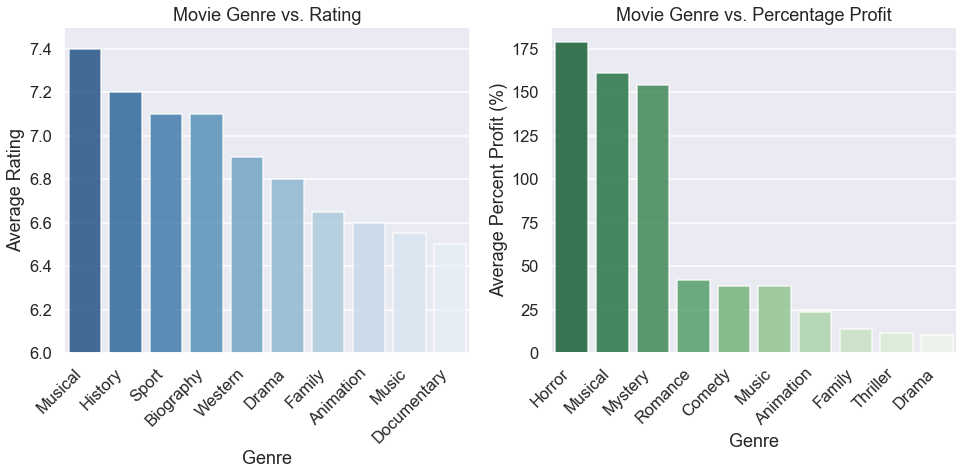

In [26]:
# Plot genre vs averagerating on bar plot

fig, axes = plt.subplots(ncols=2, figsize=(16,6))

sns.barplot(data=genre_rating_df,
    x="genre_list", y="averagerating",
    ax=axes[0], palette='Blues_r', alpha=0.8)

axes[0].set_ylim([6, 7.5])

axes[0].set_title('Movie Genre vs. Rating')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Average Rating')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot genre vs average percentage profit on a bar plot

sns.barplot(data=genre_profit_df,
    x="genre_list", y="% profit",
    ax=axes[1], palette='Greens_r', alpha=.8)

axes[1].set_title('Movie Genre vs. Percentage Profit')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average Percent Profit (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right');

#### What genres of movie are likely to succeed?

Our bar plot indicates that Musicals have a tendency to receive higher ratings with non-fictional genres including History, Biography and Sports following closely behind. 

However, the most profitable genres by far appear to be Horror, Musicals, and Mystery.

The Musical genre appears to be a top performer in both cases, but otherwise, genre choice will depend on whether Microsoft's goal is to build a reputation for building good movies, or if it is purely to maximize profits in the most efficient use of its budget.

### Genre vs. Production Costs

To examine which genres have the highest mean production costs, we will use bar plots. This plot will indicate clearly which genres on average cost the most to produce.

#### Genre vs Average Production Cost

In [27]:
# Group by genre and calculate aggregate median sorted by production budget.
# Then create a high budget and low budget table.

high_budget_df = exploded_df.groupby('genre_list') \
                            .mean()[['production_budget']] \
                            .sort_values('production_budget', \
                                         ascending=False) \
                            .head(11)
high_budget_df.reset_index(inplace=True)
high_budget_df = high_budget_df[high_budget_df['genre_list'] != 'None']

low_budget_df = exploded_df.groupby('genre_list') \
                           .mean()[['production_budget']] \
                           .sort_values('production_budget', \
                                         ascending=False) \
                           .tail(10)
low_budget_df.reset_index(inplace=True)
low_budget_df = low_budget_df[low_budget_df['genre_list'] != 'None']

display(high_budget_df, low_budget_df)

,genre_list,production_budget
0,Musical,1.220000e+08
1,Adventure,1.102115e+08
2,Fantasy,1.086174e+08
3,Sci-Fi,1.059534e+08
4,Action,9.139595e+07
5,Western,9.000000e+07
6,Animation,8.890217e+07
7,Family,8.851333e+07
8,Comedy,4.551694e+07
9,History,3.823600e+07


,genre_list,production_budget
0,Crime,3.451084e+07
1,Documentary,3.321000e+07
2,Drama,2.907010e+07
3,Biography,2.760667e+07
4,Sport,2.593333e+07
5,Romance,2.232653e+07
6,Music,1.945000e+07
7,Mystery,1.868558e+07
8,Horror,1.697647e+07
9,War,1.340000e+07


#### Plotting Genre vs. Production Budget

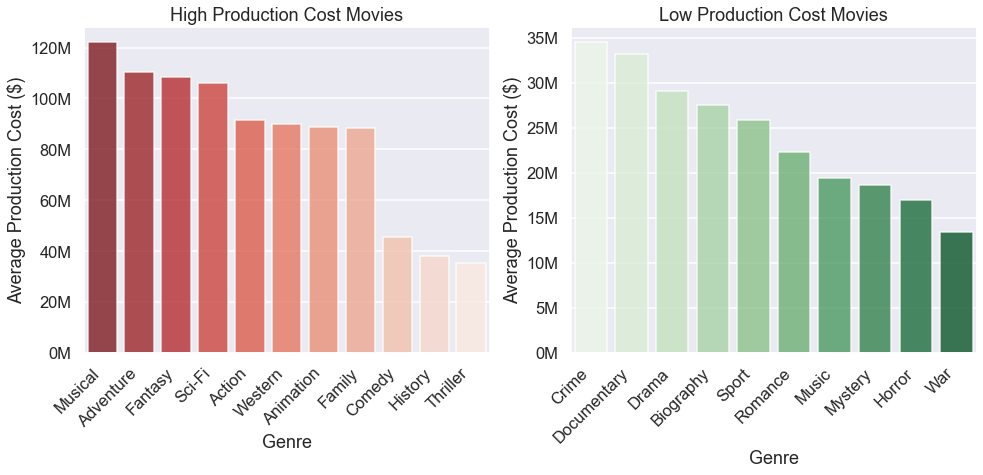

In [28]:
#Plot highest costing movies

fig, axes = plt.subplots(ncols=2, figsize=(16,6))

sns.barplot(data=high_budget_df,
    x="genre_list", y="production_budget",
    ax=axes[0], palette='Reds_r', alpha=.8)

axes[0].set_title('High Production Cost Movies')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Average Production Cost ($)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].yaxis.set_major_formatter(formatter)

# Plot lowest costing movies

sns.barplot(data=low_budget_df,
    x="genre_list", y="production_budget",
    ax=axes[1], palette='Greens', alpha=.8)

axes[1].set_title('Low Production Cost Movies')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average Production Cost ($)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].yaxis.set_major_formatter(formatter);

#### What genres cost the most and least to produce?

Musicals are by far the most costly genre of movie to produce, followed by Fantasy, Sci-Fi and Adventure. The lowest costing genres are War, Horror and Mystery.

### Production Budget vs. Percentage Profit

Now that we have an idea of the impact of genre choice, we can begin to look at how production budget affects movie success. 

#### Production Budget Data

In [29]:
# Create a copy of the dataframe to be used in our analysis of 
# budget vs. rating and budget vs. percent profit.

financial_df = merged_df
financial_df.head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,% profit,genre_list
1657,2015,Concussion,35000000,34531832.0,tt3322364,Concussion,Concussion,2015.0,123.0,"Biography,Drama,Sport",7.1,77576.0,-1.337623,"[Biography, Drama, Sport]"
3470,2015,The Second Best Exotic Marigold Hotel,10000000,33078266.0,tt2555736,The Second Best Exotic Marigold Hotel,The Second Best Exotic Marigold Hotel,2015.0,122.0,"Comedy,Drama",6.6,28931.0,230.782660,"[Comedy, Drama]"
1710,2015,Unfinished Business,35000000,10219501.0,tt2358925,Unfinished Business,Unfinished Business,2015.0,91.0,"Comedy,Drama",5.4,29004.0,-70.801426,"[Comedy, Drama]"
1163,2015,Run All Night,50000000,26461644.0,tt2199571,Run All Night,Run All Night,2015.0,114.0,"Action,Drama,Thriller",6.6,94131.0,-47.076712,"[Action, Drama, Thriller]"
1540,2015,Paul Blart: Mall Cop 2,38000000,71091594.0,tt3450650,Paul Blart: Mall Cop 2,Paul Blart: Mall Cop 2,2015.0,94.0,"Action,Comedy,Crime",4.4,30828.0,87.083142,"[Action, Comedy, Crime]"


#### Plotting Production Budget vs. Success

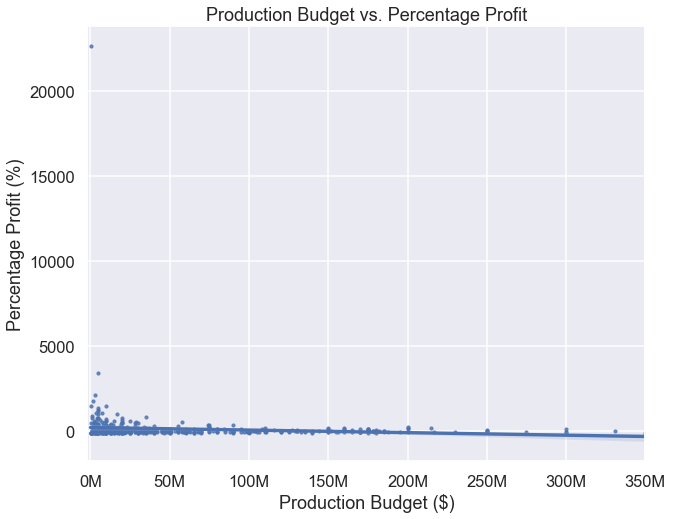

In [30]:
# Plot budget vs % profit on regression scatter plot

fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x="production_budget", y="% profit",
            data=financial_df, ax=ax, fit_reg=True, scatter_kws={'s':10})

ax.set_xlim([-2000000, 350000000])
ax.set_title('Production Budget vs. Percentage Profit')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Percentage Profit (%)')
ax.xaxis.set_major_formatter(formatter);

### Production Budget vs. Movie Success

We can see above that due to extreme outliers, our regression plot is distorted, showing a large cluster of points below 2,000% profit. Hence, we will restrict the y-axis to more clearly show our data points and regression line. 

In this situation, it is appropriate to use a regression plot to display a marker for each of our movies, showing the relationship between each movie's production budget and its respective KPI.

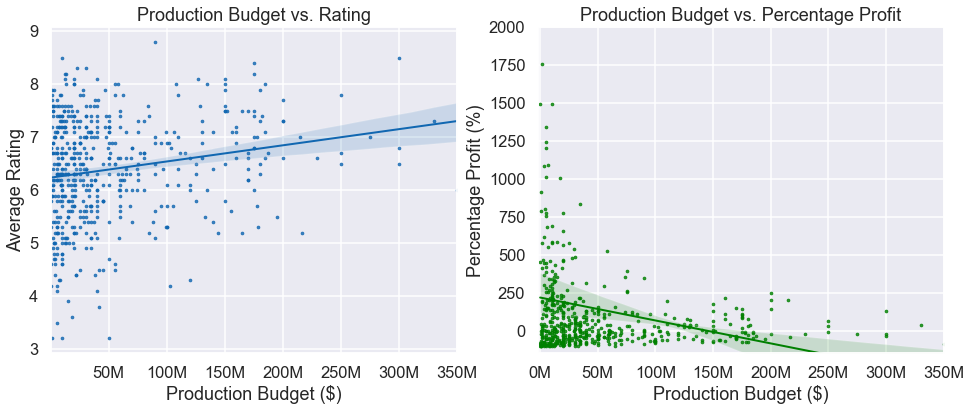

In [31]:
# Plot budget vs averagerating on regression scatter plot

fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.regplot(x="production_budget", y="averagerating", color='#1167b1',
            line_kws={"lw":2}, scatter_kws={'s':7}, data=financial_df,
            fit_reg=True, ax=axes[0])

axes[0].set_title('Production Budget vs. Rating')
axes[0].set_xlabel('Production Budget ($)')
axes[0].set_ylabel('Average Rating')
axes[0].xaxis.set_major_formatter(formatter)


# Plot and zoom in to budget vs percent profit to examine regression 
# without severe outliers

sns.regplot(x="production_budget", y="% profit", color='green',
            line_kws={"lw":2}, data=financial_df, ax=axes[1],
            fit_reg=True, scatter_kws={'s':7})
axes[1].set_ylim([-150, 2000])
axes[1].set_xlim([-2000000, 350000000])

axes[1].set_title('Production Budget vs. Percentage Profit')
axes[1].set_xlabel('Production Budget ($)')
axes[1].set_ylabel('Percentage Profit (%)')
axes[1].xaxis.set_major_formatter(formatter);

#### How does production budget affect the success of a movie?

We can see in our regression plot that as production budget increases, there is a positive trend in average rating. Conversely, we can see that profit percentages tend to decrease with larger budget movies.

In this case, it is important to note that the margin of error is skewed on the extremes of the budget. There are a much higher number of samples that are low budget, and fewer samples that are high budget. 

Therefore, we can tell that a **higher budget is more likely to receive a higher rating, while likely to return a lower profit percentage**, but movie budget is not a definitive indicator of how successful a movie will be.

This plot gives us enough information now to make a conclusion on what Microsoft should keep in mind when creating its first films.

## Evaluation

## Conclusions

There is no clear-cut formula to creating a successful movie, and there will always be exceptions, even though a certain movie might not seem to fit criteria that have had a track record of success.

Horror and Mystery movies only require a low production budget, but have a track record of receiving high profit percentages. If profit percentage is a priority for Microsoft, either of these genres would be a good pick.

However, with the above analysis, we can see that although Musicals cost the most to produce, they do have a tendency to perform well as opposed to other genres. More specifically, Musicals were likely to receive better ratings, as well as have a higher profit percentage.

Under the assumption that production budget is not a major concern for Microsoft, we can conclude that it would be a safe choice to create movies under the Musical genre, despite the slightly negative correlation between production budget and profit percentage. By focusing on receiving higher ratings, Microsoft would be able to earn a strong reputation within the film industry, allowing it to more effectively market its future productions.

Some questions to consider for further analysis include the following:

1. What would be the most efficient allocation of production budget between cast, directors and writers and does how does this apply to the most successful genres? This would include an analysis of how much impact each of these roles tend to have on a genre’s success.
2. Does the provided analysis apply when considering worldwide gross as opposed to just domestic gross? Although it would be best to start off focusing on a smaller audience, it could be in Microsoft's best interest to eventually increase production to a worldwide scale.

## Appendix

### Runtime vs. Movie Success

Another potentially useful metric to keep in mind is the movie runtime. This was not included as a main part of the analysis, since it is not as closely related to the other questions of analysis which dealt more with the impact of genre selection. 

However, there does seem to be some correlation between runtime and production budget. As we increase both budget and runtime, they both tend to result in a higher rating but a lower profit percentage. It is also intuitive that longer movies cost more to produce due to the amount of additional editing time and wages that would need to be paid.

#### Runtime Data

In [32]:
# Eliminate entries  missing data in 'runtime_minutes' to create 
# runtime dataframe.

runtime_df = merged_df[merged_df['runtime_minutes'].notna()]
runtime_df

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,% profit,genre_list
1657,2015,Concussion,35000000,34531832.0,tt3322364,Concussion,Concussion,2015.0,123.0,"Biography,Drama,Sport",7.1,77576.0,-1.337623,"[Biography, Drama, Sport]"
3470,2015,The Second Best Exotic Marigold Hotel,10000000,33078266.0,tt2555736,The Second Best Exotic Marigold Hotel,The Second Best Exotic Marigold Hotel,2015.0,122.0,"Comedy,Drama",6.6,28931.0,230.782660,"[Comedy, Drama]"
1710,2015,Unfinished Business,35000000,10219501.0,tt2358925,Unfinished Business,Unfinished Business,2015.0,91.0,"Comedy,Drama",5.4,29004.0,-70.801426,"[Comedy, Drama]"
1163,2015,Run All Night,50000000,26461644.0,tt2199571,Run All Night,Run All Night,2015.0,114.0,"Action,Drama,Thriller",6.6,94131.0,-47.076712,"[Action, Drama, Thriller]"
1540,2015,Paul Blart: Mall Cop 2,38000000,71091594.0,tt3450650,Paul Blart: Mall Cop 2,Paul Blart: Mall Cop 2,2015.0,94.0,"Action,Comedy,Crime",4.4,30828.0,87.083142,"[Action, Comedy, Crime]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2019,How to Train Your Dragon: The Hidden World,129000000,160791800.0,tt2386490,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019.0,104.0,"Action,Adventure,Animation",7.6,60769.0,24.644806,"[Action, Adventure, Animation]"
125,2019,Alita: Battle Angel,170000000,85710210.0,tt0437086,Alita: Battle Angel,Alita: Battle Angel,2019.0,122.0,"Action,Adventure,Sci-Fi",7.5,88207.0,-49.582229,"[Action, Adventure, Sci-Fi]"
3009,2019,Miss Bala,15000000,14998027.0,tt5941692,Miss Bala,Miss Bala,2019.0,104.0,"Action,Crime,Drama",5.5,3738.0,-0.013153,"[Action, Crime, Drama]"
395,2019,Wonder Park,100000000,45216793.0,tt6428676,Wonder Park,Wonder Park,2019.0,85.0,"Adventure,Animation,Comedy",5.7,3091.0,-54.783207,"[Adventure, Animation, Comedy]"


In [33]:
# Group by runtime_minutes in order and calculate aggregate median for
# all columns.

runtime_df = runtime_df.sort_values('runtime_minutes')

runtime_df.head()

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,% profit,genre_list
193,2017,The Great Wall,150000000,45157105.0,tt7535780,The Great Wall,The Great Wall,2017.0,72.0,Documentary,6.5,24.0,-69.895263,[Documentary]
5157,2015,The Overnight,200000,1109808.0,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",6.1,14828.0,454.904000,"[Comedy, Mystery]"
3613,2016,Kicks,10000000,150191.0,tt4254584,Kicks,Kicks,2016.0,80.0,"Adventure,Drama",6.3,3789.0,-98.498090,"[Adventure, Drama]"
4090,2016,Lights Out,5000000,67268835.0,tt4786282,Lights Out,Lights Out,2016.0,81.0,"Drama,Horror,Mystery",6.3,100650.0,1245.376700,"[Drama, Horror, Mystery]"
5196,2015,The Gallows,100000,22764410.0,tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",4.2,17763.0,22664.410000,"[Horror, Mystery, Thriller]"


#### Runtime vs Movie Success

To identify the relationship between runtime and movie success, we have used a regression plot to display a marker for each of the movies with an appropriate regression line for each KPI.

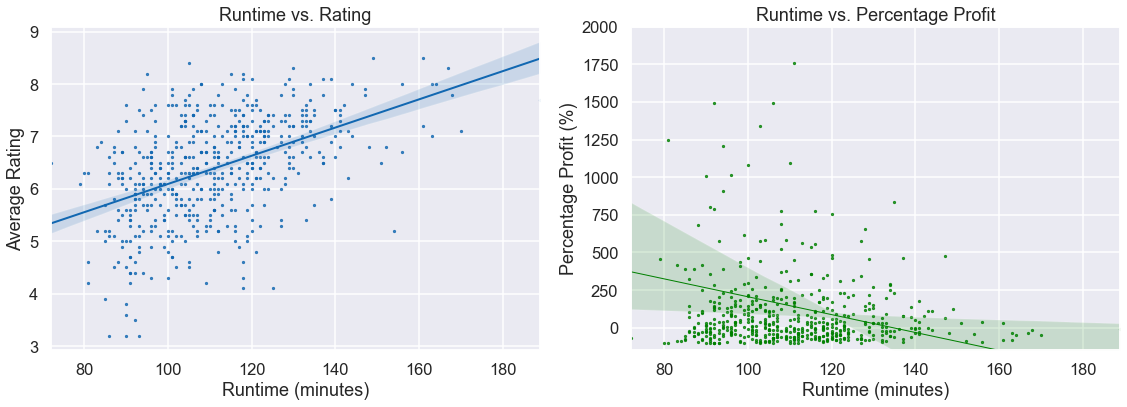

In [34]:
# Plot runtime minutes vs averagerating on regression scatter plot

fig, axes = plt.subplots(ncols=2, figsize=(16,6))

sns.regplot(x="runtime_minutes", y="averagerating", color='#1167b1',
            data=runtime_df, ax=axes[0], fit_reg=True, scatter_kws={'s':5},
            line_kws={"lw":2})

axes[0].set_title('Runtime vs. Rating')
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Average Rating')

# Plot runtime minutes vs percent profit on regression scatter plot

sns.regplot(x="runtime_minutes", y="% profit", color='green',
            data=runtime_df, ax=axes[1], fit_reg=True, scatter_kws={'s':5},
            line_kws={"lw":1})

axes[1].set_title('Runtime vs. Percentage Profit')
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('Percentage Profit (%)')
axes[1].set_ylim([-150, 2000])

plt.tight_layout();